In [11]:
import numpy as np
import pandas as pd 
from sklearn.linear_model import LinearRegression , Ridge
from sklearn.preprocessing import StandardScaler , PolynomialFeatures
from sklearn.datasets import load_diabetes
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score , mean_absolute_error , mean_squared_error , r2_score

In [2]:
data = load_diabetes()

In [3]:
data.DESCR

'.. _diabetes_dataset:\n\nDiabetes dataset\n----------------\n\nTen baseline variables, age, sex, body mass index, average blood\npressure, and six blood serum measurements were obtained for each of n =\n442 diabetes patients, as well as the response of interest, a\nquantitative measure of disease progression one year after baseline.\n\n**Data Set Characteristics:**\n\n:Number of Instances: 442\n\n:Number of Attributes: First 10 columns are numeric predictive values\n\n:Target: Column 11 is a quantitative measure of disease progression one year after baseline\n\n:Attribute Information:\n    - age     age in years\n    - sex\n    - bmi     body mass index\n    - bp      average blood pressure\n    - s1      tc, total serum cholesterol\n    - s2      ldl, low-density lipoproteins\n    - s3      hdl, high-density lipoproteins\n    - s4      tch, total cholesterol / HDL\n    - s5      ltg, possibly log of serum triglycerides level\n    - s6      glu, blood sugar level\n\nNote: Each of thes

In [4]:
data

{'data': array([[ 0.03807591,  0.05068012,  0.06169621, ..., -0.00259226,
          0.01990749, -0.01764613],
        [-0.00188202, -0.04464164, -0.05147406, ..., -0.03949338,
         -0.06833155, -0.09220405],
        [ 0.08529891,  0.05068012,  0.04445121, ..., -0.00259226,
          0.00286131, -0.02593034],
        ...,
        [ 0.04170844,  0.05068012, -0.01590626, ..., -0.01107952,
         -0.04688253,  0.01549073],
        [-0.04547248, -0.04464164,  0.03906215, ...,  0.02655962,
          0.04452873, -0.02593034],
        [-0.04547248, -0.04464164, -0.0730303 , ..., -0.03949338,
         -0.00422151,  0.00306441]]),
 'target': array([151.,  75., 141., 206., 135.,  97., 138.,  63., 110., 310., 101.,
         69., 179., 185., 118., 171., 166., 144.,  97., 168.,  68.,  49.,
         68., 245., 184., 202., 137.,  85., 131., 283., 129.,  59., 341.,
         87.,  65., 102., 265., 276., 252.,  90., 100.,  55.,  61.,  92.,
        259.,  53., 190., 142.,  75., 142., 155., 225.,  59

In [5]:
X=data['data']
y=data['target']

In [6]:
X.shape , y.shape

((442, 10), (442,))

In [8]:
X_train , X_test , y_train , y_test = train_test_split(X , y , random_state=42 , test_size=0.2)

In [9]:
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [10]:
lr = LinearRegression()
lr.fit(X_train , y_train)

,fit_intercept,True
,copy_X,True
,tol,1e-06
,n_jobs,None
,positive,False


In [12]:
y_pred  = lr.predict(X_test)
print("MAE" , mean_absolute_error(y_test , y_pred))
print("R2 Score" , r2_score(y_test , y_pred))

MAE 42.79409467959994
R2 Score 0.4526027629719195


In [16]:
# After scaling 
lr2 = LinearRegression()
lr2.fit(X_train_scaled , y_train)

,fit_intercept,True
,copy_X,True
,tol,1e-06
,n_jobs,None
,positive,False


In [17]:
y_pred2  = lr2.predict(X_test_scaled)
print("MAE" , mean_absolute_error(y_test , y_pred2))
print("R2 Score" , r2_score(y_test , y_pred2))

MAE 42.79409467959994
R2 Score 0.45260276297191937


In [26]:
Rr = Ridge(alpha=0.2) # alpha = lambda = 0.01 , by default it will be 1
Rr.fit(X_train , y_train)

,alpha,0.2
,fit_intercept,True
,copy_X,True
,max_iter,None
,tol,0.0001
,solver,'auto'
,positive,False
,random_state,None


In [27]:
y_pred3 = Rr.predict(X_test)
print("MAE" , mean_absolute_error(y_test , y_pred3))
print("R2 Score" , r2_score(y_test , y_pred3))

MAE 43.17640920550252
R2 Score 0.46113836892116755


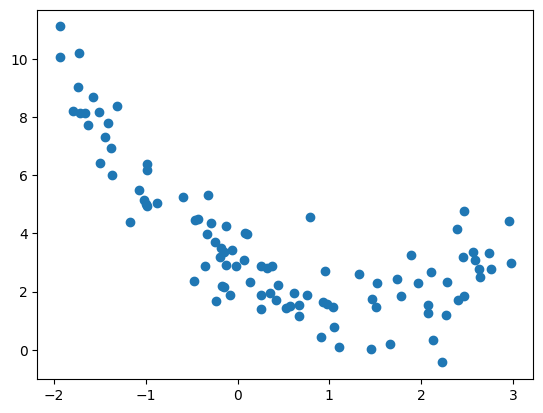

(100, 1)

In [50]:
import matplotlib.pyplot as plt 
m = 100
x = 5 * np.random.rand(m, 1) - 2
y = 0.7 * x ** 2 - 2 * x + 3 + np.random.randn(m, 1)

plt.scatter(x, y)
plt.show()
x.shape

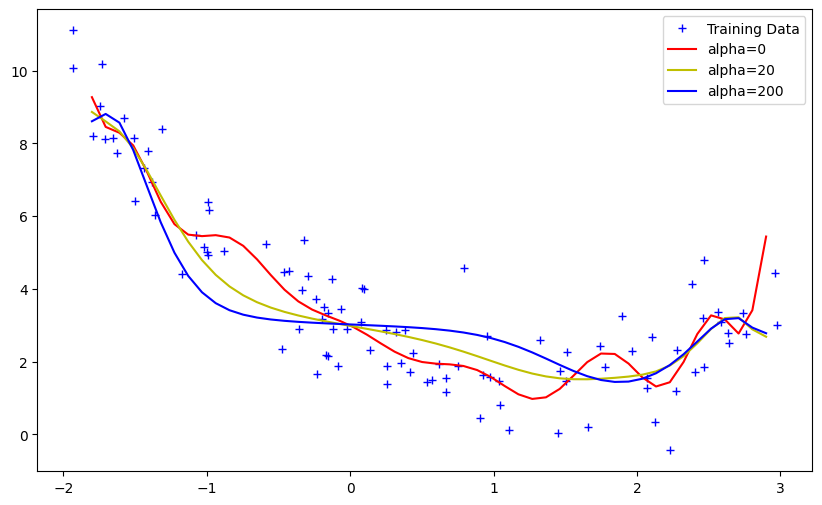

In [51]:
def train_and_predict(x_train , y_train , alpha , x_test , deg):
    pr = PolynomialFeatures(degree=deg)
    x_train_trans = pr.fit_transform(x_train)
    x_test_trans = pr.transform(x_test)
    rr = Ridge(alpha=alpha)
    rr.fit(x_train_trans , y_train)
    return rr.predict(x_test_trans)

alpha = [0, 20 , 200]    # 200 means model will become  underfit , 0 means no change , 20 is reducing the overfit
color = [ 'r' , 'y' , 'b']
x_test = np.linspace(-1.8,2.9,50).reshape(-1,1)
#x_test = x 

plt.figure(figsize=(10,6))
plt.plot(x , y  , 'b+' ,label='Training Data')

for al , c in zip(alpha,color):
    y_pred = train_and_predict(x , y , al , x_test , deg=16)
    plt.plot(x_test , y_pred ,c, label=f'alpha={al}')
plt.legend()    
plt.show()
    

    